<a href="https://colab.research.google.com/github/anikashaji/Finlatics-Projetcs/blob/main/Sales_Prediction_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Loading the dataset**

In [ ]:
import pandas as pd
df = pd.read_csv('/content/advertising_sales_data.csv')


In [ ]:
df.head(2)

,Campaign,TV,Radio,Newspaper,Sales
0,camp1,230.1,37.8,69.2,22.1
1,camp2,44.5,39.3,45.1,10.4


**CHECKING FOR NULLS**

In [ ]:
df.isnull().sum()

,0
Campaign,0
TV,0
Radio,2
Newspaper,0
Sales,0


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
df.columns

Index(['Campaign', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [ ]:
df['Radio'] = imputer.fit_transform(df[['Radio']])

In [ ]:
df.isnull().sum()

,0
Campaign,0
TV,0
Radio,0
Newspaper,0
Sales,0


**Interpretation - ALL THE NULLS ARE REMOVED**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Campaign   200 non-null    object 
 1   TV         200 non-null    float64
 2   Radio      200 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.9+ KB


**DROP UNNECESSARY COLUMNS**

In [ ]:
df = df.drop(columns = ['Campaign'])

**AVERAGE AMOUNT SPENT ON TV ADVERTISING**

In [ ]:
average_tv_advertising = df['TV'].mean()

# Print the result
print(f"The average amount spent on TV advertising is: {average_tv_advertising}")

The average amount spent on TV advertising is: 147.0425


**CORRELATION BETWEEN RADIO ADVERTISING AND ITS SALES**

In [ ]:
correlation_radio_sales = df['Radio'].corr(df['Sales'])

# Print the result
print(f"The correlation between radio advertising expenditure and product sales is: {correlation_radio_sales}")

The correlation between radio advertising expenditure and product sales is: 0.3496507429302875


**MEDIUM WITH HIGHEST IMPACT ON SALES**

In [ ]:
correlation_tv_sales = df['TV'].corr(df['Sales'])
correlation_radio_sales = df['Radio'].corr(df['Sales'])
correlation_newspaper_sales = df['Newspaper'].corr(df['Sales'])

# Print the results
print(f"Correlation between TV advertising expenditure and product sales: {correlation_tv_sales}")
print(f"Correlation between Radio advertising expenditure and product sales: {correlation_radio_sales}")
print(f"Correlation between Newspaper advertising expenditure and product sales: {correlation_newspaper_sales}")

# Determine which advertising medium has the highest impact
highest_impact = max(correlation_tv_sales, correlation_radio_sales, correlation_newspaper_sales)
if highest_impact == correlation_tv_sales:
    medium = "TV"
elif highest_impact == correlation_radio_sales:
    medium = "Radio"
else:
    medium = "Newspaper"

print(f"The advertising medium with the highest impact on sales is: {medium}")

Correlation between TV advertising expenditure and product sales: 0.9012079133023306
Correlation between Radio advertising expenditure and product sales: 0.3496507429302875
Correlation between Newspaper advertising expenditure and product sales: 0.15796002615492621
The advertising medium with the highest impact on sales is: TV


EXPLORATORY DATA ANALYSIS

In [ ]:
import plotly.express as px

In [ ]:
px.histogram(df,x='Sales',nbins=20)

**INTERPRETATION - Sales is highest between 16 to 17.9**

In [ ]:
px.histogram(df,x='TV',nbins=20)

**INTERPRETATION - TV is having highest as 0-19.9 and 220-239.9**

In [ ]:
px.histogram(df,x='Radio', y='Sales')

**NTERPRETATION - Radio is having highest sales between 2.5 and 7.4**

**DIVIDING DATA INTO FEATURES AND TARGET VARIABLES**

In [ ]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

**DIVIDING DATA INTO TRAIN AND TEST**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.80,random_state=42)


**TRAINING THE MODEL**

In [ ]:
from sklearn.linear_model import LinearRegression
lrm  = LinearRegression()
lrm.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_test_pred = lrm.predict(X_test)

**PREDICTING SALES OF CUSTOM VALUES**

In [ ]:
print('Predicted Sales for TV, Radio, Newspaper:', lrm.predict([[200,40,50]]))

In [ ]:
y_test_pred

array([17.03497622, 20.41027998, 23.72424726,  9.27327347, 21.68410815,
       12.56970634, 21.08207538,  8.69073303, 17.2372595 , 16.66693723,
        8.92490136,  8.48180042, 18.20656013,  8.06844444, 12.64552699,
       14.93161538,  8.12851036, 17.89544998, 11.00913306, 20.47912184,
       20.80616348, 12.59815173, 10.90629197, 22.38850841,  9.41858078,
        7.92519331, 20.83983741, 13.81576577, 10.7710606 ,  7.92782532,
       15.95957465, 10.635478  , 20.80337677, 10.43423701, 21.57853211,
       21.18467932, 12.12952411, 22.80953422, 12.61057459,  6.46454887])

In [ ]:
y_test

,Sales
95,16.9
15,22.4
30,21.4
158,7.3
128,24.7
115,12.6
69,22.3
170,8.4
174,16.5
45,16.1


**FINDING MEAN SQUARED ERROR**

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_test_pred)

2.9074318865000555

**INTERPRETATION - MSE is very less, indicating predicting values are more accurate**

**Visual Representation for Actual vs Predicted Sales**

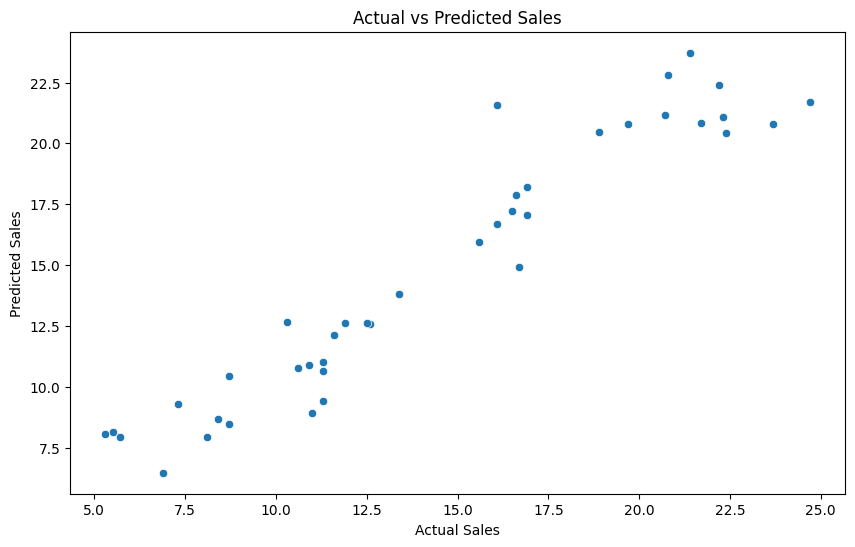

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

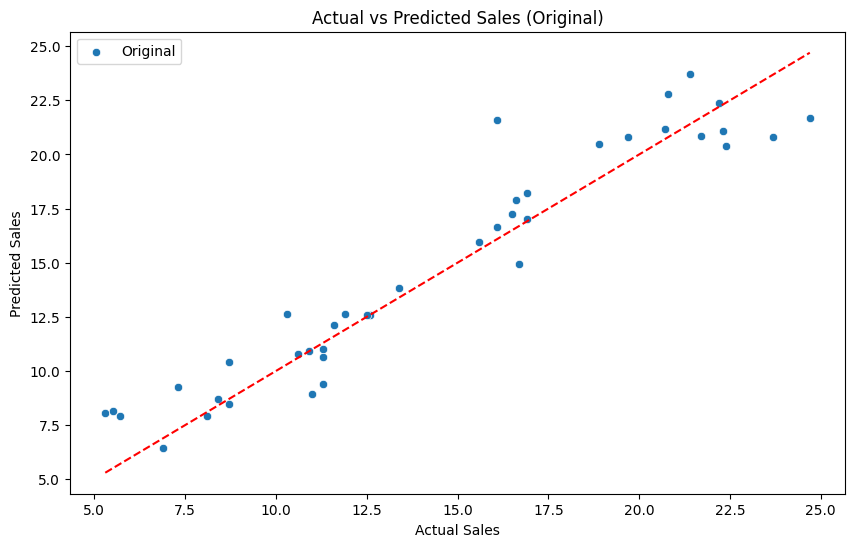

In [ ]:
 # Plot the actual vs predicted sales values for original data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred, label='Original')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales (Original)')
plt.legend()
plt.show()